[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Crise.ipynb)

### **Tema:** 📉 Crise
### **Pergunta:** 9. A partir da análise do PIB, quais regiões se recuperaram da recessão de 2014-2016?



# **Preparação dos Dados**

### **Manipulação Inicial do dados sobre Crise**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from unidecode import unidecode
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import jinja2
import csv
import re
import ast
import re
from collections import Counter

### **Tabela BrStats**

Lendo o arquivo **BrStats** e definindo ';' como separador.

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ';', low_memory= False)
dados

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5.932,854,537,13.692,111.190,252.0,38.0,38.0,...,NaN,"25.511.889,220","18.911.068,400","1.665.392,540",80.0,0.0,"32,065",SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27.505,5.680,4.778,104.977,554.663,671.0,3.0,3.0,...,"1.777.256,000","63.002.672,933","45.304.154,440","538.882,600",299.0,3.0,"55,065",MG,Elói Mendes,Sudeste
2,2016,3552007,6.193,668,580,12.519,62.441,83.0,0.0,0.0,...,NaN,"30.492.825,449","21.861.157,950","1.048.458,040",59.0,2.0,"14,930",SP,Silveiras,Sudeste
3,2016,3305604,21.279,3.087,2.669,80.161,403.121,290.0,0.0,0.0,...,NaN,"140.538.926,872","100.508.822,360","871.234,340",272.0,2.0,"22,698",RJ,Silva Jardim,Sudeste
4,2016,1717008,4.534,212,183,5.309,48.551,34.0,94.0,34.0,...,NaN,"15.541.375,953","13.178.989,760","8.037,870",43.0,1.0,"2,908",TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7.171,463,436,10.502,NaN,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,135.0,3.0,"83,287",AL,Monteirópolis,Nordeste
33416,2021,1600105,9.265,428,383,9.932,NaN,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,160.0,2.0,"1,010",AP,Amapá,Norte
33417,2019,2605459,3.061,2.210,1.773,43.093,192.775,289.0,0.0,0.0,...,NaN,NaN,NaN,NaN,32.0,1.0,"180,059",PE,Fernando de Noronha,Nordeste
33418,2020,1503002,7.070,538,514,12.207,63.579,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,149.0,4.0,"0,601",PA,Faro,Norte


#### Tabela BrStats contendo apenas 'UF', 'Municipio', 'Regiao'e 'PIB'

Para responder a pergunta **9. A partir da análise do PIB, quais municípios se recuperaram da recessão de 2014-2016?** precisaremos apenas dos seguintes dados:
- UF
- Municipio
- Regiao
- PIB
- Ano

Por esse motivo fizemos uma filtragem na tabela BrStats, retirando os dados não necessãrios para essa pergunta.

In [3]:
dados_filtrados = dados[['UF', 'Municipio', 'Regiao', 'PIB', 'Ano']]

dados_filtrados

,UF,Municipio,Regiao,PIB,Ano
0,SP,Campina do Monte Alegre,Sudeste,111.190,2016
1,MG,Elói Mendes,Sudeste,554.663,2016
2,SP,Silveiras,Sudeste,62.441,2016
3,RJ,Silva Jardim,Sudeste,403.121,2016
4,TO,Pindorama do Tocantins,Norte,48.551,2016
...,...,...,...,...,...
33415,AL,Monteirópolis,Nordeste,NaN,2021
33416,AP,Amapá,Norte,NaN,2021
33417,PE,Fernando de Noronha,Nordeste,192.775,2019
33418,PA,Faro,Norte,63.579,2020


É possível salvar a nova tabela em um arquivo .csv separado:

In [4]:
dados_filtrados.to_csv("BrStats_crise.csv", index=False)

### **Tabela sidra**

Como mencionado no README, fizemos uma busca no Sidra para encontrar dados do PIB dos municípios brasileiros dos anos de 2013 (anterior a crise) até 2016 (fim da crise), o arquivo gerado é o sidra.csv.

Abaixo estamos carregando e manipulando o arquivo sidra, para que possamos unir as duas tabelas de dados.

In [5]:
# Carregando o arquivo CSV com a codificação correta UTF-8, pois estava perdendo acentos
dados_sidra = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/sidra.csv', skiprows=1, encoding='utf-8')

# Renomeando as colunas
dados_sidra.columns = ['Município', '2013', '2014', '2015', '2016', '2017']

# Removendo linhas sem dados úteis que vieram do PDF (Fonte, Notas, etc.)
dados_sidra = dados_sidra.dropna() 
dados_sidra = dados_sidra[~dados_sidra['Município'].str.contains('Fonte:|Notas|1 -', na=False)] 

# Salvando o arquivo corrigido com codificação UTF-8
dados_sidra.to_csv('sidra_limpos.csv', index=False, encoding='utf-8-sig')

Um detalhe a ser corrigido antes de unirmos as tabelas do BrStats com a do Sidra é a maneira como municípios e UF estão registrados, enquanto o dataset BrStats possui uma coluna chamada 'UF', o dataset do Sidra escreve a UF na mesma coluna do município, e por isso devemos criar uma nova coluna nesse dataset.

In [6]:
# Criando a coluna UF
if 'UF' not in dados_sidra.columns:
    dados_sidra['UF'] = ''

# Separaando Município e UF
dados_sidra[['Município', 'UF']] = dados_sidra['Município'].str.extract(r'(.+) \((\w{2})\)')

dados_sidra

,Município,2013,2014,2015,2016,2017,UF
0,Alta Floresta D'Oeste,341.325,377.799,421.300,478.217,485.374,RO
1,Ariquemes,1.799.853,1.921.532,2.037.799,2.184.346,2.287.910,RO
2,Cabixi,96.365,113.477,116.565,133.342,138.110,RO
3,Cacoal,1.433.254,1.660.650,1.794.478,1.947.283,2.082.761,RO
4,Cerejeiras,353.270,392.417,397.736,408.194,439.245,RO
...,...,...,...,...,...,...,...
5565,Vianópolis,291.919,302.880,312.348,373.802,395.861,GO
5566,Vicentinópolis,259.422,275.800,322.298,351.750,350.839,GO
5567,Vila Boa,103.233,90.478,111.229,138.810,118.639,GO
5568,Vila Propício,142.970,138.474,198.935,210.475,182.203,GO


### **Unindo os dois Datasets**

O dataset BrStats não possui colunas específicas para os anos em que os PIBs foram registrados, então optamos por fazer divisão para facilitar a análise.

In [7]:
# Criando um DataFrame onde cada ano vira uma coluna
dados = dados.pivot_table(
    index=['UF', 'Municipio', 'Regiao'],  # Colunas que permanecerão como índice
    columns='Ano',                        # Coluna que será transformada em novas colunas
    values='PIB',                         # Valores que preencherão as novas colunas
    aggfunc='first'                       # Função de agregação (usamos 'first' pois não há duplicatas)
)

# Resetar o índice para trazer UF, Municipio e Regiao de volta como colunas
dados = dados.reset_index()

dados

Ano,UF,Municipio,Regiao,2016,2017,2018,2019,2020
0,AC,Acrelândia,Norte,239.610,229.644,253.138,253.152,302.445
1,AC,Assis Brasil,Norte,85.322,91.743,89.875,92.705,96.920
2,AC,Brasiléia,Norte,388.521,388.018,439.547,454.009,480.142
3,AC,Bujari,Norte,159.696,158.301,158.191,159.100,183.818
4,AC,Capixaba,Norte,177.480,170.990,164.238,152.806,145.318
...,...,...,...,...,...,...,...,...
5560,TO,Tocantínia,Norte,61.070,67.831,71.807,129.131,135.159
5561,TO,Tupirama,Norte,46.019,46.142,49.166,55.980,94.549
5562,TO,Tupiratins,Norte,28.051,28.582,29.772,29.993,33.798
5563,TO,Wanderlândia,Norte,154.098,161.897,140.641,134.885,149.907


Outro problema a ser corrigido é a coluna 'Municipio' no dataset do Sidra, que possui acentuação, enquanto a do BrStats não possui, e precisaremos que elas possuam nomeclatura idêntica para uni-las.

In [8]:
dados_sidra = dados_sidra.rename(columns={'Município': 'Municipio'})

Unindo os dois datasets utilizando como base as colunas 'Municipio' e 'UF'.

In [9]:
dados_crise = dados.merge(dados_sidra, on=['Municipio', 'UF'])

# Salvar o arquivo corrigido com codificação UTF-8
dados_crise.to_csv('dados_crise.csv', index=False, encoding='utf-8-sig')

dados_crise

,UF,Municipio,Regiao,2016,2017,2018,2019,2020,2013,2014,2015,2016,2017
0,AC,Acrelândia,Norte,239.610,229.644,253.138,253.152,302.445,214.652,207.822,212.961,239.610,229.644
1,AC,Assis Brasil,Norte,85.322,91.743,89.875,92.705,96.920,64.602,73.332,77.234,85.322,91.743
2,AC,Brasiléia,Norte,388.521,388.018,439.547,454.009,480.142,294.874,340.917,388.114,388.521,388.018
3,AC,Bujari,Norte,159.696,158.301,158.191,159.100,183.818,120.210,129.895,147.868,159.696,158.301
4,AC,Capixaba,Norte,177.480,170.990,164.238,152.806,145.318,158.800,149.067,160.134,177.480,170.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,TO,Tocantínia,Norte,61.070,67.831,71.807,129.131,135.159,47.927,49.172,58.998,61.070,67.831
5445,TO,Tupirama,Norte,46.019,46.142,49.166,55.980,94.549,79.472,68.282,47.485,46.019,46.142
5446,TO,Tupiratins,Norte,28.051,28.582,29.772,29.993,33.798,21.891,25.998,24.533,28.051,28.582
5447,TO,Wanderlândia,Norte,154.098,161.897,140.641,134.885,149.907,125.772,134.428,138.573,154.098,161.897


É possível perceber que o dataset ainda precisa de alguns ajustes, como ordenar corretamente os anos e remover os que se repetem.

In [10]:
dados_crise = pd.read_csv('dados_crise.csv')
dados_crise

,UF,Municipio,Regiao,2016,2017,2018,2019,2020,2013,2014,2015,2016.1,2017.1
0,AC,Acrelândia,Norte,239.610,229.644,253.138,253.152,302.445,214.652,207.822,212.961,239.610,229.644
1,AC,Assis Brasil,Norte,85.322,91.743,89.875,92.705,96.920,64.602,73.332,77.234,85.322,91.743
2,AC,Brasiléia,Norte,388.521,388.018,439.547,454.009,480.142,294.874,340.917,388.114,388.521,388.018
3,AC,Bujari,Norte,159.696,158.301,158.191,159.100,183.818,120.210,129.895,147.868,159.696,158.301
4,AC,Capixaba,Norte,177.480,170.990,164.238,152.806,145.318,158.800,149.067,160.134,177.480,170.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,TO,Tocantínia,Norte,61.070,67.831,71.807,129.131,135.159,47.927,49.172,58.998,61.070,67.831
5445,TO,Tupirama,Norte,46.019,46.142,49.166,55.980,94.549,79.472,68.282,47.485,46.019,46.142
5446,TO,Tupiratins,Norte,28.051,28.582,29.772,29.993,33.798,21.891,25.998,24.533,28.051,28.582
5447,TO,Wanderlândia,Norte,154.098,161.897,140.641,134.885,149.907,125.772,134.428,138.573,154.098,161.897


In [11]:
# Removendo colunas duplicadas
cols_to_remove = ['2016.1', '2017.1']
dados_crise = dados_crise.drop(columns=[col for col in cols_to_remove if col in dados_crise.columns])

# Reordenando colunas
fixed_cols = ['UF', 'Municipio', 'Regiao']
year_cols = sorted([col for col in dados_crise.columns if col.isdigit()])
dados_crise = dados_crise[fixed_cols + year_cols]

# Salvando o resultado
output_file = '.dados_final.csv'
dados_crise.to_csv(output_file, index=False)

dados_crise

,UF,Municipio,Regiao,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,Acrelândia,Norte,214.652,207.822,212.961,239.610,229.644,253.138,253.152,302.445
1,AC,Assis Brasil,Norte,64.602,73.332,77.234,85.322,91.743,89.875,92.705,96.920
2,AC,Brasiléia,Norte,294.874,340.917,388.114,388.521,388.018,439.547,454.009,480.142
3,AC,Bujari,Norte,120.210,129.895,147.868,159.696,158.301,158.191,159.100,183.818
4,AC,Capixaba,Norte,158.800,149.067,160.134,177.480,170.990,164.238,152.806,145.318
...,...,...,...,...,...,...,...,...,...,...,...
5444,TO,Tocantínia,Norte,47.927,49.172,58.998,61.070,67.831,71.807,129.131,135.159
5445,TO,Tupirama,Norte,79.472,68.282,47.485,46.019,46.142,49.166,55.980,94.549
5446,TO,Tupiratins,Norte,21.891,25.998,24.533,28.051,28.582,29.772,29.993,33.798
5447,TO,Wanderlândia,Norte,125.772,134.428,138.573,154.098,161.897,140.641,134.885,149.907


Com isso obtivemos um dataset com apenas os dados necessários para a análise do PIB antes, durante e depois da crise de 2014-2016.

In [12]:
for col in year_cols:
    dados_crise[col] = (
        dados_crise[col]
        .str.replace('.', '', regex=False)  
        .str.replace(',', '.', regex=False)  
        .astype(float)  
    )

dados_crise[['UF', 'Municipio', 'Regiao']] = dados_crise[['UF', 'Municipio', 'Regiao']].astype('string')

dados_crise.dtypes

UF           string[python]
Municipio    string[python]
Regiao       string[python]
2013                float64
2014                float64
2015                float64
2016                float64
2017                float64
2018                float64
2019                float64
2020                float64
dtype: object

# **Entrega 4 - Regressão Linear**

Para o desenvolvimento da entrega 4, seguimos o artigo "Resultado primário pós-crise econômica de 2014: um estudo nos municípios brasileiros no exercício de 2016", de Allan Jonson Piccini, e optamos por adicionar dados retirados do Finbra (Finanças do Brasil), então a sessão a seguir mostrará o carregamento e tratamento das tabelas obtidas do Finbra, com as receitas dos municípios do Brasil dos anos de 2013 até 2016. 

## Manipulação Inicial

### **Receitas obtidas pelo Finbra**

Para a utilização dos dados obtidos do Finbra fizemos diversas manipulações para remover e renomear colunas, tais alterações foram exportadas para arquivos, e esses arquivos foram colocados no github, abaixo estamos importandos os dataframes retirados do Finbra, já tratados.

In [13]:
df_transformado_2013 = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/df_transformado_2013.csv', sep=',', low_memory=False)
df_transformado_2014 = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/df_transformado_2014.csv', sep=',', low_memory=False)
df_transformado_2015 = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/df_transformado_2015.csv', sep=',', low_memory=False)   
df_transformado_2016 = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/df_transformado_2016.csv', sep=',', low_memory=False)   

### **Juntando Datasets**

In [14]:
receita = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ';', low_memory= False)

receita = receita[['Receitas_R$', 'Municipio', 'Regiao', 'UF']]

df_transformado_2013 = df_transformado_2013.rename(columns={'Município': 'Municipio'})

df_transformado_2013.to_csv('df_transformado_2013.csv', index=False)

A função abaixo será utilizada para unir o datasef dados_crise, que contém os PIBs reais de cada municípios, com a receita desses municípios em determinado anos, unindo o df_transformado_2013 com o PIB do ano de 2013 retirado de dados_crise.

In [15]:
# Sua linha de formatação global está correta para quando as colunas forem float:
pd.options.display.float_format = lambda x: "{:,.2f}".format(x).replace(',', '@TEMP@').replace('.', ',').replace('@TEMP@', '.')

def limpar_valor_monetario(valor):
    """Converte uma string monetária (ex: '1.234,56') para float."""
    if pd.isna(valor): 
        return pd.NA
    if isinstance(valor, (int, float)):
        return float(valor)
    if isinstance(valor, str):
        valor_limpo = valor.strip()
        if ',' in valor_limpo and '.' in valor_limpo:
            if valor_limpo.rfind('.') > valor_limpo.rfind(','): 
                valor_limpo = valor_limpo.replace('.', '') 
                valor_limpo = valor_limpo.replace(',', '.') 
            else: 
                valor_limpo = valor_limpo.replace('.', '') 
                valor_limpo = valor_limpo.replace(',', '.') 
        elif ',' in valor_limpo: 
            valor_limpo = valor_limpo.replace(',', '.')
        try:
            return float(valor_limpo)
        except ValueError:
            return pd.NA # Retorna pd.NA se a conversão falhar
    return pd.NA

def normalize_text(texto):
    """Normaliza texto: string, strip, upper, unidecode."""
    if pd.isna(texto):
        return pd.NA
    try:
        texto_str = str(texto).strip().upper()
        return unidecode(texto_str)
    except Exception:
        return pd.NA

def preparar_dados_municipais(
    df_receitas: pd.DataFrame,
    df_despesas: pd.DataFrame,
    df_pib: pd.DataFrame,
    ano: str  # ex: '2013'
) -> pd.DataFrame | None:
    df_receitas_proc = df_receitas.copy()
    df_despesas_proc = df_despesas.copy()
    df_pib_proc = df_pib.copy()

    # --- NORMALIZAÇÃO ---
    for df, nome_df in [(df_pib_proc, 'PIB'), (df_receitas_proc, 'Receitas'), (df_despesas_proc, 'Despesas')]:
        if 'Municipio' in df.columns:
            df['Municipio'] = df['Municipio'].apply(normalize_text)
        if 'UF' in df.columns:
            df['UF'] = df['UF'].apply(normalize_text)

    # --- VERIFICAÇÃO DE COLUNAS ---
    colunas_pib_necessarias = ['Municipio', 'UF', 'Regiao', ano]
    colunas_receita_necessarias = ['Municipio', 'UF', 'Receitas_R$']
    colunas_despesa_necessarias = ['Municipio', 'UF', 'População', 'Total Despesa']
    # (Seu loop de verificação de colunas aqui...)
    for df_check, nome, colunas in [
        (df_pib_proc, 'df_pib', colunas_pib_necessarias),
        (df_receitas_proc, 'df_receitas', colunas_receita_necessarias),
        (df_despesas_proc, 'df_despesas', colunas_despesa_necessarias)
    ]:
        if not all(col in df_check.columns for col in colunas):
            print(f"Erro: Faltam colunas em {nome}. Esperadas: {colunas}. Colunas presentes: {df_check.columns.tolist()}")
            return None
            
    # --- LIMPEZA E CONVERSÃO INICIAL ---
    try:
        df_pib_proc[ano] = df_pib_proc[ano].apply(limpar_valor_monetario)
        df_receitas_proc['Receitas_R$'] = df_receitas_proc['Receitas_R$'].apply(limpar_valor_monetario)
        df_despesas_proc['Total Despesa'] = df_despesas_proc['Total Despesa'].apply(limpar_valor_monetario)
        
        if 'População' in df_despesas_proc.columns:
            # Limpeza para População, assumindo que pode ter '.' como separador de milhar e precisa ser int/float
            df_despesas_proc['População'] = df_despesas_proc['População'].astype(str).str.replace('.', '', regex=False)
            # Convertido para numérico aqui, pd.NA se não puder.
            df_despesas_proc['População'] = pd.to_numeric(df_despesas_proc['População'], errors='coerce')


    except Exception as e:
        print(f"Erro durante a limpeza e conversão de tipos: {e}")
        return None

    # --- AGREGAÇÃO ---
    # (Suas seções de try-except para agregação de df_pib_agg, df_receitas_agg, df_despesas_agg aqui...)
    try:
        df_pib_agg = df_pib_proc.rename(columns={ano: 'PIB'})
        agg_funcs_pib = {'Regiao': 'first', 'PIB': 'first'}
        df_pib_agg = df_pib_agg.groupby(['Municipio', 'UF'], as_index=False).agg(agg_funcs_pib)
    except Exception as e:
        print(f"Erro ao processar df_pib: {e}")
        return None

    try:
        df_receitas_agg = df_receitas_proc.groupby(['Municipio', 'UF'], as_index=False).agg(
            {'Receitas_R$': 'first'}
        )
    except Exception as e:
        print(f"Erro ao processar df_receitas: {e}")
        return None

    try:
        agg_funcs_despesas = {'Total Despesa': 'first', 'População': 'first'}
        df_despesas_agg = df_despesas_proc.groupby(['Municipio', 'UF'], as_index=False).agg(agg_funcs_despesas)
        
        # População já foi convertida para numérico antes, mas aqui garantimos o tipo Int64 para permitir NAs
        if 'População' in df_despesas_agg.columns:
             df_despesas_agg['População'] = pd.to_numeric(df_despesas_agg['População'], errors='coerce').astype('Int64')

    except Exception as e:
        print(f"Erro ao processar df_despesas: {e}")
        return None

    # --- MERGES ---
    df_merged = pd.merge(df_pib_agg, df_receitas_agg, on=['Municipio', 'UF'], how='inner')
    df_merged = pd.merge(df_merged, df_despesas_agg, on=['Municipio', 'UF'], how='inner')

    if df_merged.empty:
        print("Aviso: O resultado do merge está vazio.")
        return None
    
    # --- ORDENAÇÃO E SELEÇÃO DE COLUNAS FINAIS ---
    colunas_finais = ['Municipio', 'UF', 'Regiao', 'PIB', 'População', 'Receitas_R$', 'Total Despesa']
    colunas_finais_presentes = [col for col in colunas_finais if col in df_merged.columns]
    df_merged = df_merged[colunas_finais_presentes] # Reordena e seleciona

    # !!!!! ADIÇÃO IMPORTANTE AQUI !!!!!
    # Garante que as colunas monetárias e de população sejam do tipo numérico adequado
    # Isso é crucial para que pd.options.display.float_format funcione.
    colunas_para_converter_numeric = ['PIB', 'Receitas_R$', 'Total Despesa']
    for col in colunas_para_converter_numeric:
        if col in df_merged.columns:
            df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce') 
            # errors='coerce' transformará em NaN o que não puder ser convertido

    if 'População' in df_merged.columns:
        # População pode ser Int64 se já foi tratada, mas uma conversão final é segura
        df_merged['População'] = pd.to_numeric(df_merged['População'], errors='coerce').astype('Int64')


    # Verificação de duplicatas (opcional, mas útil para depuração)
    duplicatas_finais = df_merged[df_merged.duplicated(subset=['Municipio', 'UF'], keep=False)]
    if not duplicatas_finais.empty:
        print("ALERTA: Duplicatas ['Municipio', 'UF'] encontradas no DataFrame final!")
        
    return df_merged

In [16]:
df_final_2013 = preparar_dados_municipais(
    df_receitas=receita,
    df_despesas=df_transformado_2013,
    df_pib=dados_crise,
    ano='2013'
)

In [17]:
def adicionar_saldo(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converte colunas de receita e despesa do formato brasileiro para float
    e adiciona a coluna 'Saldo' com a diferença entre elas.
    """

    def parse_brl(value):
        if pd.isna(value):
            return None
        return float(str(value).replace('.', '').replace(',', '.'))

    df['Receitas_R$'] = df['Receitas_R$'].apply(parse_brl)
    df['Total Despesa'] = df['Total Despesa'].apply(parse_brl)

    df['Saldo'] = df['Receitas_R$'] - df['Total Despesa']
    return df


In [18]:
df_final_2013 = adicionar_saldo(df_final_2013)
;

''

### **Normalizando os dados**

In [19]:
df_final_2013['PIB'] = df_final_2013['PIB'] / (10**3)
df_final_2013['Saldo'] = df_final_2013['Saldo'] / (10**6)

#Adicionando a tabela percapita
df_final_2013['PIB_per_capita'] = df_final_2013['PIB'] / df_final_2013['População']


In [20]:
""""
def transformar_asinh(coluna_dados):
  #Aplica a transformação asinh.
  return np.arcsinh(coluna_dados)

def transformar_log_sinalizado(coluna_dados):
  #Aplica a transformação logarítmica sinalizada: sign(x) * log1p(|x|).
  return np.sign(coluna_dados) * np.log1p(np.abs(coluna_dados))

colunas_para_transformar = ['Receitas_R$', 'Total Despesa', 'Saldo', 'PIB', 'PIB_per_capita']

if colunas_para_transformar:
    for coluna in colunas_para_transformar:
        if coluna not in df_final_2013.columns:
            print(f"Aviso: Coluna '{coluna}' não encontrada. Pulando.")
            continue

        contem_negativos = (df_final_2013[coluna] < 0).any()
        contem_zeros = (df_final_2013[coluna] == 0).any()

        if coluna == 'Saldo': 
            # df_final_2013[coluna + '_asinh'] = transformar_asinh(df_final_2013[coluna])
            # Logarítmica sinalizada:
            df_final_2013[coluna + '_log_sinalizado'] = transformar_log_sinalizado(df_final_2013[coluna])

        elif contem_negativos:
            df_final_2013[coluna + '_asinh'] = transformar_asinh(df_final_2013[coluna])

        elif contem_zeros:
            df_final_2013[coluna + '_log1p'] = np.log1p(df_final_2013[coluna])

        else:
            df_final_2013[coluna + '_log'] = np.log(df_final_2013[coluna])
"""
;

''

### **Remoção dos Outliers e NaNs**

In [21]:
df_final_2013.dropna(inplace=True)

In [22]:
def remover_outliers_iqr(df, colunas, fator=1.5):
    """
    Remove outliers usando o método IQR
    fator: multiplicador do IQR (1.5 é padrão, 3.0 é mais conservador)
    """
    df_clean = df.copy()
    
    for coluna in colunas:
        Q1 = df_clean[coluna].quantile(0.25)
        Q3 = df_clean[coluna].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inferior = Q1 - fator * IQR
        limite_superior = Q3 + fator * IQR
        
        # Filtrar apenas valores dentro dos limites
        df_clean = df_clean[
            (df_clean[coluna] >= limite_inferior) & 
            (df_clean[coluna] <= limite_superior)
        ]
        
    return df_clean

In [23]:
df_final_2013 = remover_outliers_iqr(df_final_2013,['PIB', 'Saldo'], fator=1.5)

## Regressão Linear Univariada

A ideia nessa etapa é ver o quanto o saldo orçamentário , que é a diferença entre a receita e as despesas de um município, pode explicar o PIB, e subsequentemente usa-lo para prever o PIB de outros municipios, para isso usaremos a regressão linear, o algoritmo que a biblioteca scikit-learn usa para a regressão linear é o OLS (Ordinario Least Squares).

In [24]:
df_final_completo = df_final_2013.copy()

<Figure size 1200x800 with 0 Axes>

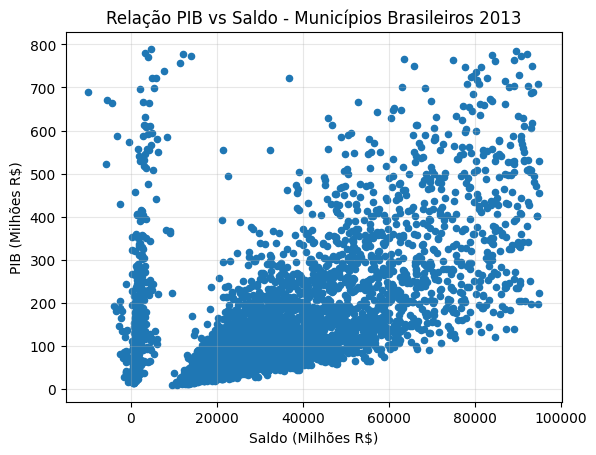

In [27]:
# Verificando se há uma relação linear entre as variáveis
plt.figure(figsize=(12, 8))

df_final_completo.plot(kind ='scatter', x = 'Saldo', y = 'PIB')

plt.xlabel('Saldo (Milhões R$)')
plt.ylabel('PIB (Milhões R$)')
plt.title('Relação PIB vs Saldo - Municípios Brasileiros 2013')
plt.grid(True, alpha=0.3)
plt.show()

In [28]:
#Dividindo o dataset em dados de treino e dados de teste
xTrain, xTest, yTrain, yTest = train_test_split(df_final_completo.Saldo, df_final_completo.PIB)

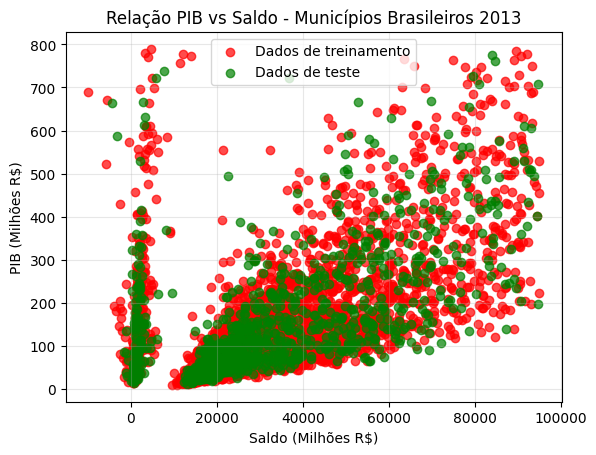

In [37]:
# Visualização da divisão entre treino e teste
plt.scatter(xTrain, yTrain, label = 'Dados de treinamento', color = 'r', alpha=.7)
plt.scatter(xTest, yTest, label = 'Dados de teste', color = 'g', alpha=.7)
plt.title("Divisão Teste/Treino")
plt.xlabel('Saldo (Milhões R$)')
plt.ylabel('PIB (Milhões R$)')
plt.title('Relação PIB vs Saldo - Municípios Brasileiros 2013')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [30]:
# Criando o modelo de regressão linear e iniciando o treinamento
model = LinearRegression()
model.fit(xTrain.values.reshape(-1,1),yTrain.values)
;

''

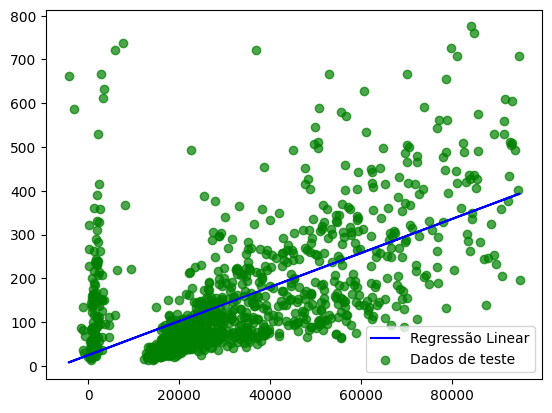

In [ ]:
# Testando o modelo no dataset de teste
prediction = model.predict(xTest.values.reshape(-1,1))

# Visualização do teste
plt.plot(xTest, prediction, label= 'Regressão Linear', color = 'b')
plt.scatter(xTest, yTest, label = 'Dados de teste', color = 'g', alpha =.7)
plt.xlabel('Saldo (Milhões R$)')
plt.ylabel('PIB (Milhões R$)')
plt.title('Relação PIB vs Saldo - Municípios Brasileiros 2013')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [ ]:
# Atributos do modelo
print(f"R² : {model.score(xTest.values.reshape(-1,1), yTest.values)}")
print(f"Coeficiente : {model.coef_[0]}")
print(f"Constante : {model.intercept_}")

R² : 0.35639522627989173
Coeficiente : 0.0038914304014709138
Constante : 24.761588139927795


Um R² indica que o 